In [ ]:
7import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Train_data.csv")
data

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,-5.461,Major,01-07-2014,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,-14.014,Major,01-01-1959,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,-9.298,Minor,01-01-1984,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,-26.324,Major,09-01-2017,0.1180,73.234,0.00558,2017,3.1,high


In [ ]:
data =data.drop("id",axis=1)
data["loudness"]= (data["loudness"]-data["loudness"].min())/(data["loudness"].max()-data["loudness"].min())
data['mode'].replace(to_replace=['Major', 'Minor'], value=[1,0], inplace=True)
data['explicit'].replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)
data["duration-min"]= (data["duration-min"]-data["duration-min"].min())/(data["duration-min"].max()-data["duration-min"].min())
data["tempo"]= (data["tempo"]-data["tempo"].min())/(data["tempo"].max()-data["tempo"].min())
data['popularity'].replace(to_replace=['very high','high','average','low','very low'], value=[5,4,3,2,1], inplace=True)

In [ ]:
key_dummies=pd.get_dummies(data.key)
data = pd.concat([data, key_dummies], axis=1)
data=data.drop(columns=["key"])
data

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity,0,1,2,3,4,5,6,7,8,9,10,11
0,0.9490,0.2350,0.0276,0,0.927000,0.513,0.365189,1,01-01-1947,0.0381,0.511144,0.03980,1947,0.038567,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0.8550,0.4560,0.4850,0,0.088400,0.151,0.752995,1,13-11-2020,0.0437,0.701272,0.85900,2020,0.030303,2,0,0,0,0,1,0,0,0,0,0,0,0
2,0.8270,0.4950,0.4990,0,0.000000,0.401,0.798520,0,01-01-1950,0.0474,0.498075,0.70900,1950,0.033058,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0.6540,0.6430,0.4690,0,0.108000,0.218,0.621782,1,30-04-1974,0.0368,0.385698,0.96400,1974,0.030303,2,0,0,0,0,0,0,0,1,0,0,0,0
4,0.7380,0.7050,0.3110,0,0.000000,0.322,0.701636,1,01-01-1973,0.0488,0.540760,0.78500,1973,0.044077,3,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,0.0408,0.8090,0.8010,0,0.000000,0.353,0.855467,1,01-07-2014,0.4070,0.377877,0.74400,2014,0.044077,3,0,1,0,0,0,0,0,0,0,0,0,0
12223,0.9120,0.4510,0.2400,0,0.000002,0.175,0.664313,1,01-01-1959,0.0351,0.618000,0.70100,1959,0.024793,5,0,1,0,0,0,0,0,0,0,0,0,0
12224,0.3280,0.5510,0.5640,0,0.002950,0.352,0.769712,0,01-01-1984,0.0338,0.575914,0.89000,1984,0.031680,2,0,0,1,0,0,0,0,0,0,0,0,0
12225,0.1220,0.0608,0.9390,0,0.991000,0.912,0.389192,1,09-01-2017,0.1180,0.337728,0.00558,2017,0.039945,4,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
release_date=pd.to_datetime(data.release_date)

data.insert(11, "day", release_date.dt.dayofweek, True) 


In [ ]:
count =0
for i in data["release_date"]:
  data["release_date"][count]= int(i[3:5])
  count+=1


data["release_date"]=pd.to_numeric(data["release_date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data['acousticness'] = data['acousticness'].astype(float)
data.apply(pd.to_numeric)
data.drop_duplicates()
data.describe()

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,day,valence,year,duration-min,popularity,0,1,2,3,4,5,6,7,8,9,10,11
count,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000
mean,0.430578,0.556353,0.522129,0.108040,0.149321,0.201365,0.739078,0.694120,4.682506,0.097680,0.544945,2.775170,0.525300,1984.517298,0.050801,2.491453,0.121125,0.084812,0.109266,0.040730,0.075489,0.095690,0.053734,0.119735,0.059868,0.103214,0.068864,0.067474
std,0.366893,0.175373,0.262482,0.310443,0.297954,0.173987,0.123075,0.460798,4.092936,0.155895,0.139272,1.951291,0.258205,25.911998,0.032826,1.176612,0.326286,0.278614,0.311986,0.197671,0.264189,0.294177,0.225500,0.324665,0.237251,0.304251,0.253233,0.250851
min,0.000001,0.000000,0.000020,0.000000,0.000000,0.014700,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1920.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058950,0.438000,0.303000,0.000000,0.000000,0.096200,0.672314,0.000000,1.000000,0.034700,0.438338,1.000000,0.321000,1966.000000,0.037190,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.354000,0.569000,0.534000,0.000000,0.000115,0.132000,0.763320,1.000000,3.000000,0.045600,0.539169,3.000000,0.532000,1987.000000,0.046832,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.805000,0.685000,0.739000,0.000000,0.055650,0.252000,0.830648,1.000000,9.000000,0.078900,0.627682,4.000000,0.737000,2008.000000,0.057851,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.996000,0.980000,1.000000,1.000000,1.000000,0.997000,1.000000,1.000000,12.000000,0.968000,1.000000,6.000000,1.000000,2021.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


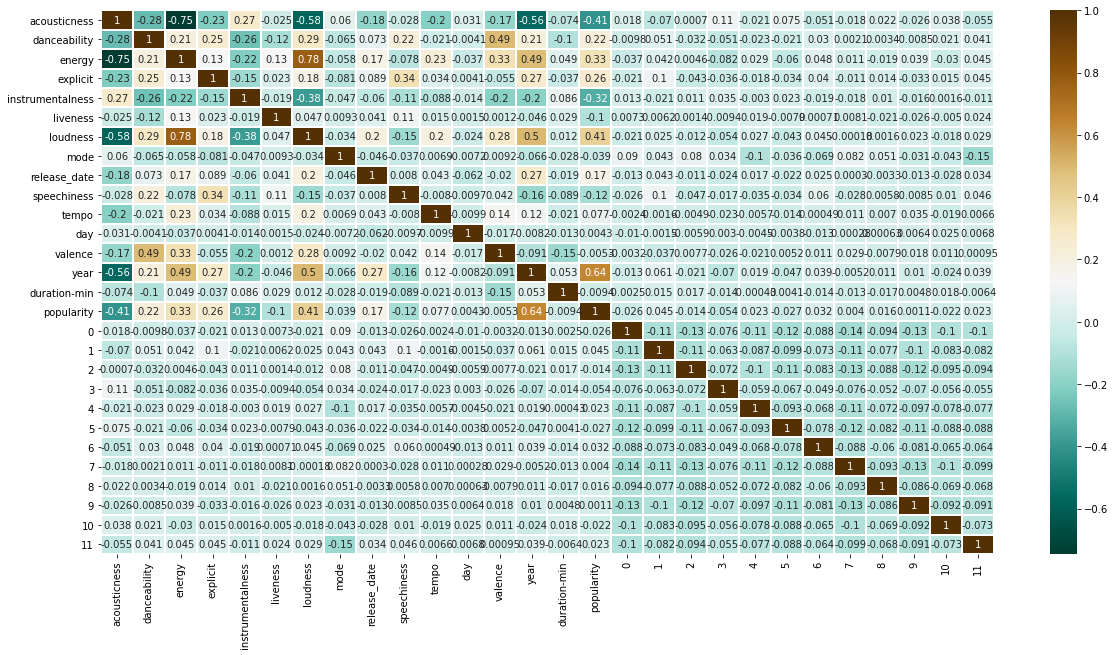

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,linewidths=1,fmt='.2g',cmap='BrBG_r')

In [ ]:
data

,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,release_date,speechiness,tempo,day,valence,year,duration-min,popularity,0,1,2,3,4,5,6,7,8,9,10,11
0,0.9490,0.2350,0.0276,0,0.927000,0.513,0.365189,1,1,0.0381,0.511144,2,0.03980,1947,0.038567,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0.8550,0.4560,0.4850,0,0.088400,0.151,0.752995,1,11,0.0437,0.701272,4,0.85900,2020,0.030303,2,0,0,0,0,1,0,0,0,0,0,0,0
2,0.8270,0.4950,0.4990,0,0.000000,0.401,0.798520,0,1,0.0474,0.498075,6,0.70900,1950,0.033058,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0.6540,0.6430,0.4690,0,0.108000,0.218,0.621782,1,4,0.0368,0.385698,1,0.96400,1974,0.030303,2,0,0,0,0,0,0,0,1,0,0,0,0
4,0.7380,0.7050,0.3110,0,0.000000,0.322,0.701636,1,1,0.0488,0.540760,0,0.78500,1973,0.044077,3,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,0.0408,0.8090,0.8010,0,0.000000,0.353,0.855467,1,7,0.4070,0.377877,1,0.74400,2014,0.044077,3,0,1,0,0,0,0,0,0,0,0,0,0
12223,0.9120,0.4510,0.2400,0,0.000002,0.175,0.664313,1,1,0.0351,0.618000,3,0.70100,1959,0.024793,5,0,1,0,0,0,0,0,0,0,0,0,0
12224,0.3280,0.5510,0.5640,0,0.002950,0.352,0.769712,0,1,0.0338,0.575914,6,0.89000,1984,0.031680,2,0,0,1,0,0,0,0,0,0,0,0,0
12225,0.1220,0.0608,0.9390,0,0.991000,0.912,0.389192,1,1,0.1180,0.337728,4,0.00558,2017,0.039945,4,0,1,0,0,0,0,0,0,0,0,0,0


# **Adding new features**

In [ ]:
acoustic_bin=[]
for i in data["acousticness"]:
  if i>0.8:
    acoustic_bin.append(1)
  else:
    acoustic_bin.append(0)

data.insert(2,"acoustic_bin",acoustic_bin,True)

spns=[]
for i in data["speechiness"]:
  if(i>0.6):
    spns.append(1)
  if(i<=0.6):
    spns.append(0)

data.insert(13, "speech_bin", spns, True)

function=[]
count=0
for i in data["loudness"]:
  function.append((i+data["energy"][count])/2)
  count+=1

data.insert(6, "loud_enegry", function, True) 


data['friday'] = (data.day == 4)
data['friday'] = data['friday'].map({ True :1, False :0})

data

,acousticness,danceability,acoustic_bin,energy,explicit,instrumentalness,loud_enegry,liveness,loudness,mode,release_date,speechiness,tempo,day,speech_bin,valence,year,duration-min,popularity,0,1,2,3,4,5,6,7,8,9,10,11,friday
0,0.9490,0.2350,1,0.0276,0,0.927000,0.196394,0.513,0.365189,1,1,0.0381,0.511144,2,0,0.03980,1947,0.038567,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.8550,0.4560,1,0.4850,0,0.088400,0.618997,0.151,0.752995,1,11,0.0437,0.701272,4,0,0.85900,2020,0.030303,2,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0.8270,0.4950,1,0.4990,0,0.000000,0.648760,0.401,0.798520,0,1,0.0474,0.498075,6,0,0.70900,1950,0.033058,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.6540,0.6430,0,0.4690,0,0.108000,0.545391,0.218,0.621782,1,4,0.0368,0.385698,1,0,0.96400,1974,0.030303,2,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.7380,0.7050,0,0.3110,0,0.000000,0.506318,0.322,0.701636,1,1,0.0488,0.540760,0,0,0.78500,1973,0.044077,3,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,0.0408,0.8090,0,0.8010,0,0.000000,0.828233,0.353,0.855467,1,7,0.4070,0.377877,1,0,0.74400,2014,0.044077,3,0,1,0,0,0,0,0,0,0,0,0,0,0
12223,0.9120,0.4510,1,0.2400,0,0.000002,0.452156,0.175,0.664313,1,1,0.0351,0.618000,3,0,0.70100,1959,0.024793,5,0,1,0,0,0,0,0,0,0,0,0,0,0
12224,0.3280,0.5510,0,0.5640,0,0.002950,0.666856,0.352,0.769712,0,1,0.0338,0.575914,6,0,0.89000,1984,0.031680,2,0,0,1,0,0,0,0,0,0,0,0,0,0
12225,0.1220,0.0608,0,0.9390,0,0.991000,0.664096,0.912,0.389192,1,1,0.1180,0.337728,4,0,0.00558,2017,0.039945,4,0,1,0,0,0,0,0,0,0,0,0,0,1


# **Model**

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split

# After Preprocessing data
X=data.drop(columns=["popularity"])
y=data.popularity
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,shuffle=True,test_size=0.2)


# Oversampling the train data, a side not-> don't do it on valdation data
print("#samples each class of target BEFORE oversampling: ")
print(y_train.value_counts())

# Try to change the k_neighbors value and analuse the sampled data
smote= SMOTE(sampling_strategy="minority",k_neighbors=5,n_jobs=-1)
x_resample,y_resample=smote.fit_resample(x_train, y_train)
x_resample=pd.DataFrame(x_resample)
y_resample=pd.Series(y_resample)

print("\n#samples each class of target AFTER oversampling: ")
print(y_resample.value_counts())

## DO same for ADASYN sampler instead of SMOTE

#samples each class of target BEFORE oversampling: 
1    2577
2    2494
3    2330
4    2085
5     295
Name: popularity, dtype: int64

#samples each class of target AFTER oversampling: 
5    2577
1    2577
2    2494
3    2330
4    2085
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X=data.drop(columns=["popularity","speechiness"])
y=data.popularity
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,shuffle=True,test_size=0.2)'''

'from sklearn.model_selection import train_test_split\nfrom sklearn.metrics import classification_report,confusion_matrix\n\nX=data.drop(columns=["popularity","speechiness"])\ny=data.popularity\nx_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,shuffle=True,test_size=0.2)'

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()